In [13]:

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


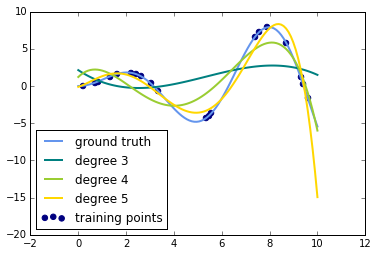

In [14]:


def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x)


# generate points used to plot
x_plot = np.linspace(0, 10, 100)

# generate points and keep a subset of them
x = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:20])
y = f(x)

# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

colors = ['teal', 'yellowgreen', 'gold']
lw = 2
plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw,
         label="ground truth")
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

for count, degree in enumerate([3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
             label="degree %d" % degree)

plt.legend(loc='lower left')

plt.show()

In [25]:
# headers and general configs/settings

import os
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import pylab as plb

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

import pandas as pd

#--------------------------------------------------------------
# General options for figures, ..., etc:

%matplotlib inline

pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
plb.rcParams['figure.figsize'] = 18,10

colors = ['g', 'k', 'b', 'm', 'r']
linestyles = ['-', '-.', '--', ':', '-']

#plt.rcParams['lines.linewidth'] = 10
#matplotlib.rc('lines', linewidth=2)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}

matplotlib.rc('font', **font)

#--------------------------------------------------------------
# related functions:

def plot_models(x, y, models, fname, mx=None, ymax=None, xmin=None):
    plt.clf()
    plt.scatter(x, y, s=25)
    plt.title("Web traffic over the last month")
    plt.xlabel("Time")
    plt.ylabel("Hits/hour")
    plt.xticks(
        [w * 7 * 24 for w in range(10)], ['week %i' % w for w in range(10)])

    if models:
        if mx is None:
            mx = sp.linspace(0, x[-1], 1000)
        for model, style, color in zip(models, linestyles, colors):
            # print "Model:",model
            # print "Coeffs:",model.coeffs
            plt.plot(mx, model(mx), linestyle=style, linewidth=2.3, c=color)

        plt.legend(["d=%i" % m.order for m in models], loc="upper left")

    plt.autoscale(tight=True)
    plt.ylim(ymin=0)
    if ymax:
        plt.ylim(ymax=ymax)
    if xmin:
        plt.xlim(xmin=xmin)
    plt.grid(True, linestyle='-', color='0.75')
    plt.savefig(fname)

print ''
#--------------------------------------------------------------

File location:
/Users/Ahmed/Documents/DataMining_Stuff/Machine-Learning/Tutorials/packt-tutorials/1400OS_Code/1400OS_01_Codes/code/../data

Looking at the first 10 lines, using pandas
    1\t2272
0    2\tnan
1   3\t1386
2   4\t1365
3   5\t1488
4   6\t1337
5   7\t1883
6   8\t2283
7   9\t1335
8  10\t1025
9  11\t1139

Number of invalid entries, 'nan's: 8
(735,)
[  1.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.  16.
  17.  18.  19.  20.  21.  22.  24.  25.  26.  27.  28.  29.  30.  31.  32.
  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.]
[ 2272.    nan  1386.  1365.  1488.  1337.  1883.  2283.  1335.  1025.
  1139.  1477.  1203.  1311.  1299.  1494.  1159.  1365.  1272.  1246.
  1071.  1876.    nan  1410.   925.  1533.  2104.  2113.  1993.  1045.
  2090.  2227.  1413.  1718.  1721.  1291.  1838.  2540.  1608.  2455.]
Number of invalid entries after removing them, validation: 0



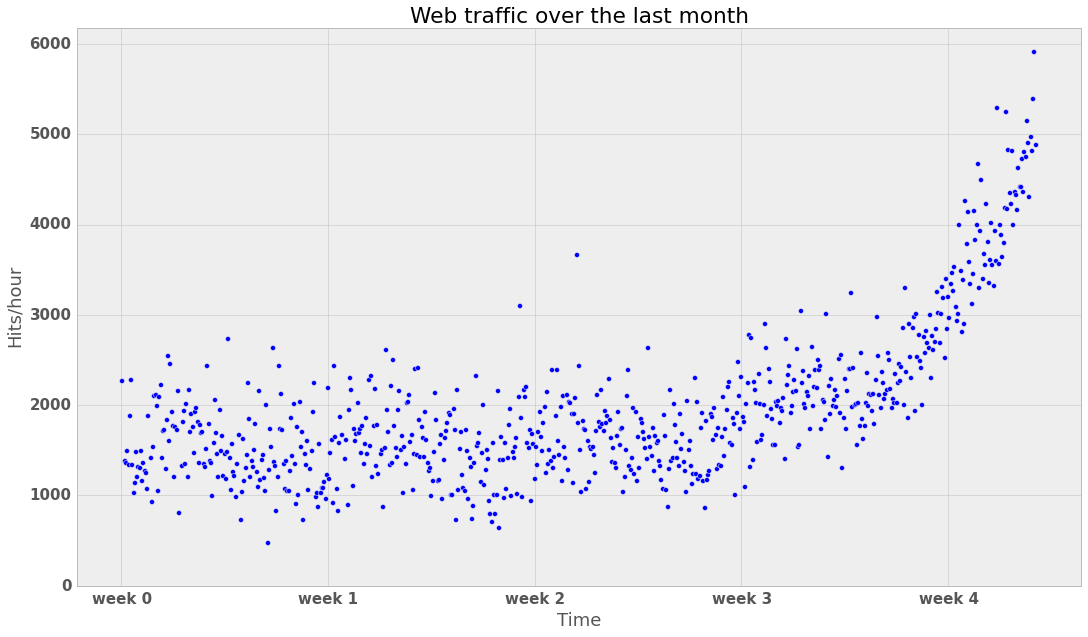

In [33]:
# loading and manipulating, ploting the original data

data_dir = os.path.join(
    os.path.dirname(os.path.realpath("__file__")), "..", "data")
print "File location:"
print data_dir
print ""
data = sp.genfromtxt(os.path.join(data_dir, "web_traffic.tsv"), delimiter="\t")

x = data[:, 0]
y = data[:, 1]

data_pd = pd.read_csv(os.path.join(data_dir,'web_traffic.tsv'))
print "Looking at the first 10 lines, using pandas"
print data_pd[:10]
print ""

print "Number of invalid entries, 'nan's:", sp.sum(sp.isnan(y))
x = x[~sp.isnan(y)]
print x.shape
print x[:40]
print y[:40]
y = y[~sp.isnan(y)]
print"Number of invalid entries after removing them, validation:", sp.sum(sp.isnan(y))
print ""


plot_models(x, y, None, os.path.join(".."))#, "1400_01_01.png"))

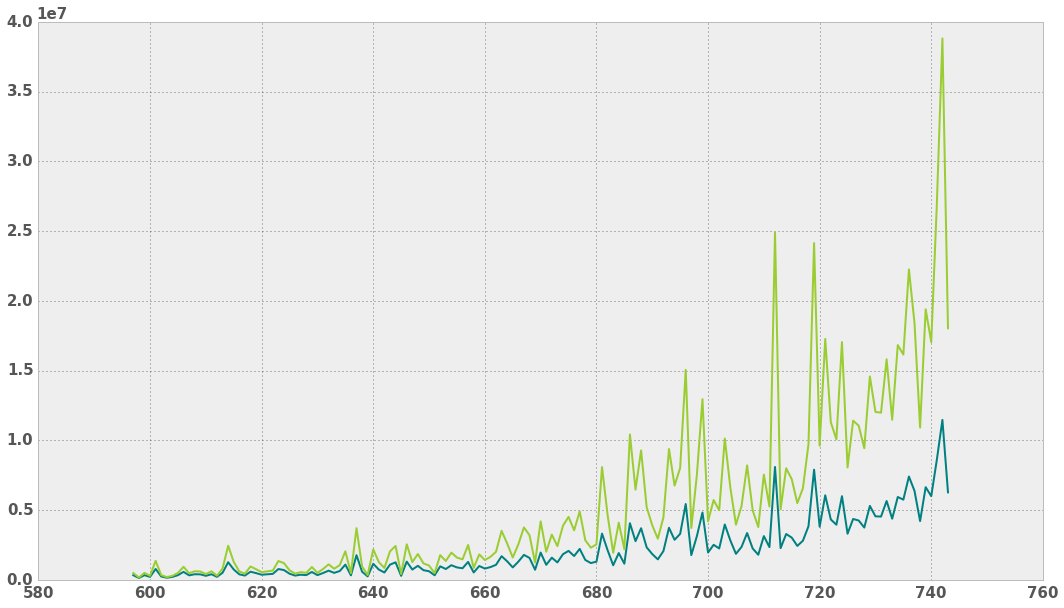

In [56]:
# creating the training set: I will create two training sets based on the behavior of the data.
# notice there is an inflection point before the 4th week, we divide at that point.

inflection = 3.5 * 7 * 24 # inflection point calculated in hours

xa = x[:inflection] # x-data before the inflrction point
ya = y[:inflection] # y-data before the inflection point
xb = x[inflection:] # x-data after the inflrction point
yb = y[inflection:] # y-data after the inflrction point

# x_b = pd.DataFrame(xb)
# y_b = pd.DataFrame(yb)

#x_b = xb[:,np.newaxis]
colors = ['teal', 'yellowgreen', 'gold']
lw = 2

#plt.scatter(xb, yb, color='navy', s=30, marker='o', label="training points") # he created training set, do we need that?
#plt.scatter(xa, ya, color='green', s=30, marker='o', label="training points") 
for count, degree in enumerate([3,4]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(xb.reshape(len(xb), 1), yb)
    #fit(chntrain_X.reshape(len(chntrain_X), 1), chntrain_Y)
    y_plot = model.predict(yb.reshape(len(yb), 1)) # this will be yb
    plt.plot(xb, y_plot, color=colors[count], linewidth=lw,
             label="degree %d" % degree) # x_plot here will be xb


In [44]:
x_b = pd.DataFrame(xb)
print xb

[ 597.  598.  599.  600.  601.  602.  603.  604.  605.  606.  607.  608.
  609.  610.  611.  612.  613.  614.  615.  616.  617.  618.  619.  620.
  621.  622.  623.  624.  625.  626.  627.  628.  629.  630.  631.  632.
  633.  634.  635.  636.  637.  638.  639.  640.  641.  642.  643.  644.
  645.  646.  647.  648.  649.  650.  651.  652.  653.  654.  655.  656.
  657.  658.  659.  660.  661.  662.  663.  664.  665.  666.  667.  668.
  669.  670.  671.  672.  673.  674.  675.  676.  677.  678.  679.  680.
  681.  682.  683.  684.  685.  686.  687.  688.  689.  690.  691.  692.
  693.  694.  695.  696.  697.  698.  699.  700.  701.  702.  703.  704.
  705.  706.  707.  708.  709.  710.  711.  712.  713.  714.  715.  716.
  717.  718.  719.  720.  721.  722.  723.  724.  725.  726.  727.  728.
  729.  730.  731.  732.  733.  734.  735.  736.  737.  738.  739.  740.
  741.  742.  743.]


In [17]:

# General options for figures, ... etc:
%matplotlib inline

#pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
plb.rcParams['figure.figsize'] = 15,8

colors = ['g', 'k', 'b', 'm', 'r']
linestyles = ['-', '-.', '--', ':', '-']

#plt.rcParams['lines.linewidth'] = 10
#matplotlib.rc('lines', linewidth=2)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}

matplotlib.rc('font', **font)
#----------------------------------------------------------------
data_dir = os.path.join(
    os.path.dirname(os.path.realpath("__file__")), "..", "data")
print "File location:"
print data_dir
#print ""
data = sp.genfromtxt(os.path.join(data_dir, "web_traffic.tsv"), delimiter="\t")

def plot_models(x, y, models, fname, mx=None, ymax=None, xmin=None):
    plt.clf()
    plt.scatter(x, y, s=20)
    plt.title("Web traffic over the last month")
    plt.xlabel("Time")
    plt.ylabel("Hits/hour")
    plt.xticks(
        [w * 7 * 24 for w in range(10)], ['week %i' % w for w in range(10)])

    if models:
        if mx is None:
            mx = sp.linspace(0, x[-1], 1000)
        for model, style, color in zip(models, linestyles, colors):
            # print "Model:",model
            # print "Coeffs:",model.coeffs
            plt.plot(mx, model(mx), linestyle=style, linewidth=2, c=color)

        plt.legend(["d=%i" % m.order for m in models], loc="upper left")

    plt.autoscale(tight=True)
    plt.ylim(ymin=0)
    if ymax:
        plt.ylim(ymax=ymax)
    if xmin:
        plt.xlim(xmin=xmin)
    plt.grid(True, linestyle='-', color='0.75')
    plt.savefig(fname)

File location:
/Users/Ahmed/Documents/DataMining_Stuff/Machine-Learning/Tutorials/packt-tutorials/1400OS_Code/1400OS_01_Codes/code/../data


Automatically created module for IPython interactive environment


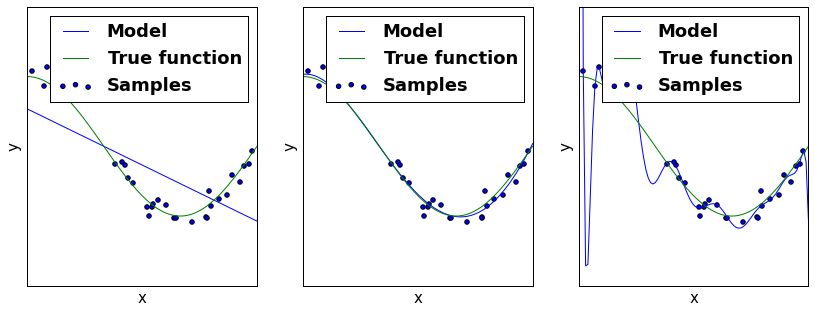

In [22]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

true_fun = lambda X: np.cos(1.5 * np.pi * X)
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    #scores = cross_val_score(pipeline, X[:, np.newaxis], y,
    #                         scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    #plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
    #    degrees[i], -scores.mean(), scores.std()))
plt.show()

Automatically created module for IPython interactive environment
subset: [ 0.2020202   0.70707071  0.80808081  1.31313131  1.61616162  2.22222222
  2.42424242  2.62626263  3.03030303  3.33333333  5.35353535  5.45454545
  5.55555556  7.37373737  7.57575758  7.87878788  8.68686869  9.29292929
  9.39393939  9.5959596 ]
(20,)
the matrix version of subset: [ 0.2020202   0.70707071  0.80808081  1.31313131  1.61616162  2.22222222
  2.42424242  2.62626263  3.03030303  3.33333333  5.35353535  5.45454545
  5.55555556  7.37373737  7.57575758  7.87878788  8.68686869  9.29292929
  9.39393939  9.5959596 ]
(20,)


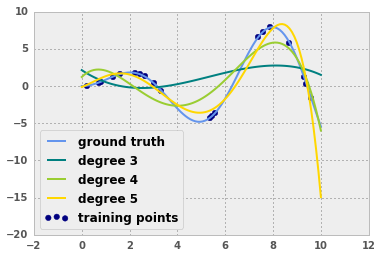

In [24]:
print(__doc__)

# Author: Mathieu Blondel
#         Jake Vanderplas
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

%matplotlib inline

def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x)


# generate points used to plot
x_plot = np.linspace(0, 10, 100)

# generate points and keep a subset of them
x = np.linspace(0, 10, 100)
#print 'set: %s' % x
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:20])
print 'subset: %s' % x
print x.shape
y = f(x)

# create matrix versions of these arrays
X = x[:, np.newaxis]
print 'the matrix version of subset: %s' %x 
print x.shape

X_plot = x_plot[:, np.newaxis]

colors = ['teal', 'yellowgreen', 'gold']
lw = 2
plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw,
         label="ground truth")
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

for count, degree in enumerate([3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
             label="degree %d" % degree)

plt.legend(loc='lower left')

plt.show()

In [12]:
np.linspace(0, 20)

array([  0.        ,   0.40816327,   0.81632653,   1.2244898 ,
         1.63265306,   2.04081633,   2.44897959,   2.85714286,
         3.26530612,   3.67346939,   4.08163265,   4.48979592,
         4.89795918,   5.30612245,   5.71428571,   6.12244898,
         6.53061224,   6.93877551,   7.34693878,   7.75510204,
         8.16326531,   8.57142857,   8.97959184,   9.3877551 ,
         9.79591837,  10.20408163,  10.6122449 ,  11.02040816,
        11.42857143,  11.83673469,  12.24489796,  12.65306122,
        13.06122449,  13.46938776,  13.87755102,  14.28571429,
        14.69387755,  15.10204082,  15.51020408,  15.91836735,
        16.32653061,  16.73469388,  17.14285714,  17.55102041,
        17.95918367,  18.36734694,  18.7755102 ,  19.18367347,
        19.59183673,  20.        ])